In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
df=pd.read_csv("Fraud_Check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
df["Target"] = pd.cut(df["Taxable.Income"], bins = [10002,30000,160000], labels = ["Risky", "Good"])

In [4]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Target
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [5]:
df['Target'].value_counts()

Good     476
Risky    124
Name: Target, dtype: int64

In [6]:
label_encoder = preprocessing.LabelEncoder()
df['Urban']= label_encoder.fit_transform(df['Urban'],)
df['Undergrad']= label_encoder.fit_transform(df['Undergrad'],)
df['Marital.Status']= label_encoder.fit_transform(df['Marital.Status'],)

In [7]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Target
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


In [8]:
df['Target'].unique()

['Good', 'Risky']
Categories (2, object): ['Risky' < 'Good']

In [9]:
df['Target'].value_counts()

Good     476
Risky    124
Name: Target, dtype: int64

In [10]:
x=df.iloc[:,:6]
y=df['Target']

In [11]:
x

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [12]:
df['Target']= label_encoder.fit_transform(df['Target'],)
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Target
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


In [13]:
column=list(x.columns)
column

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']

In [14]:
#splting data into xtrain and ytrain data set
x_train ,x_test ,y_train ,y_test =train_test_split(x,y,test_size=0.3,random_state=30)

In [15]:
 x_train

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
208,1,2,71376,141502,3,0
181,0,0,29543,36116,20,0
447,0,1,83061,166606,5,1
362,1,0,16320,75552,17,1
129,1,2,53378,65469,26,0
...,...,...,...,...,...,...
430,1,1,98720,161215,8,0
145,0,0,33962,197422,2,1
140,1,1,27877,93390,4,1
500,1,2,57365,158780,11,1


In [16]:
y_train

208     Good
181    Risky
447     Good
362    Risky
129     Good
       ...  
430     Good
145     Good
140    Risky
500     Good
421     Good
Name: Target, Length: 420, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [17]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

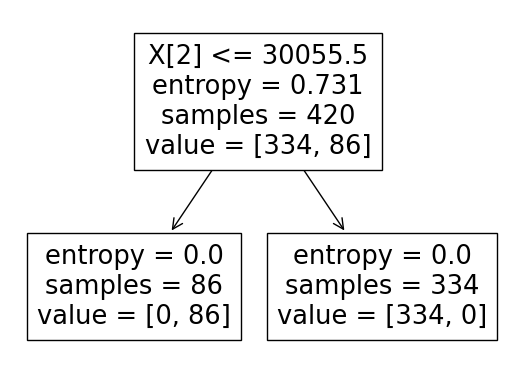

In [18]:
#plot the decision tree
tree.plot_tree(model);

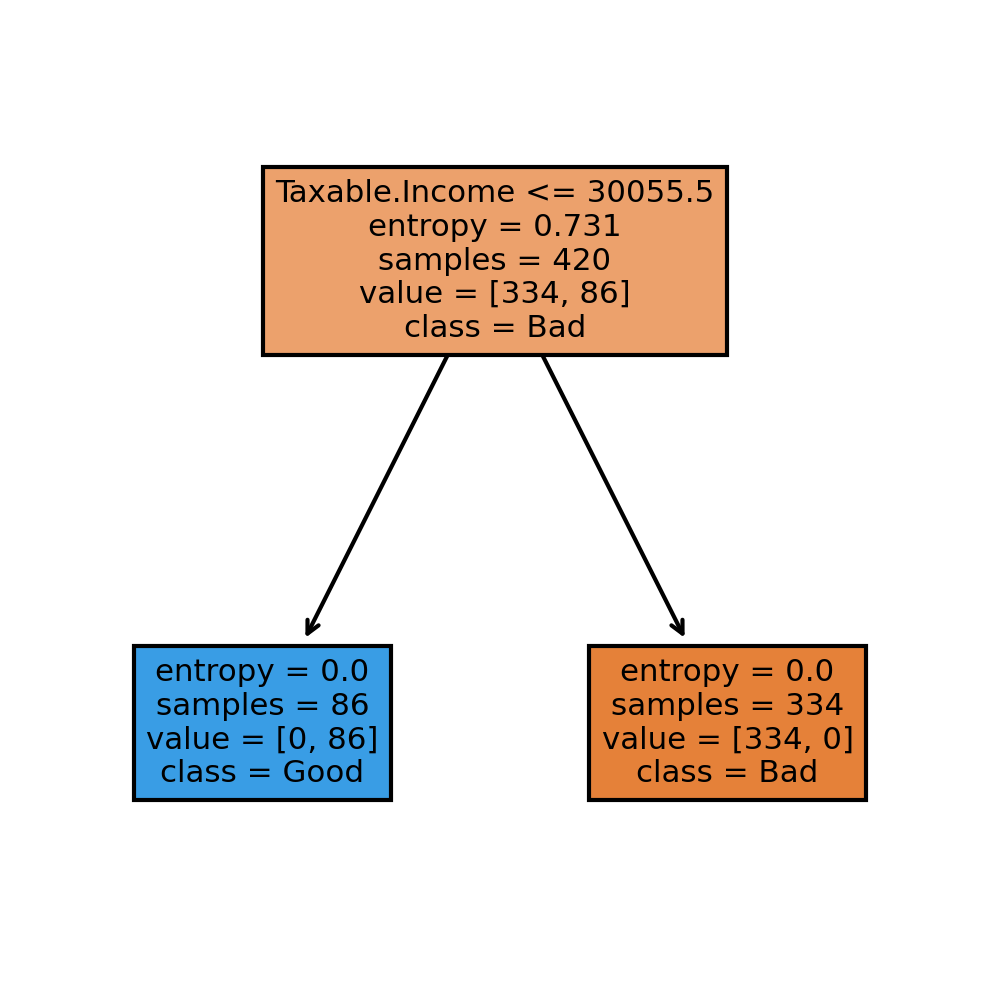

In [19]:
fn=['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']
cn=['Bad', 'Good', 'Medium'] #class name
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [20]:
#predicting on test data

#predicting on test dataset
pred=model.predict(x_test)

In [21]:
#getting count of each other
pd.Series(pred).value_counts()

Good     142
Risky     38
dtype: int64

In [22]:
y_test

549     Good
124     Good
422     Good
579     Good
74      Good
       ...  
130     Good
188    Risky
171    Risky
222     Good
220     Good
Name: Target, Length: 180, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [23]:
pred

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Risky',
       'Good', 'Good', 'Risky', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Goo

In [24]:
#getting the two way table to understand the correct and wrong prediction
pd.crosstab(y_test,pred)

col_0,Good,Risky
Target,,
Risky,0,38
Good,142,0


In [25]:
np.mean(pred==y_test)

1.0

In [26]:
model_g=DecisionTreeClassifier(criterion='gini',max_depth=3)


In [27]:
model_g.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

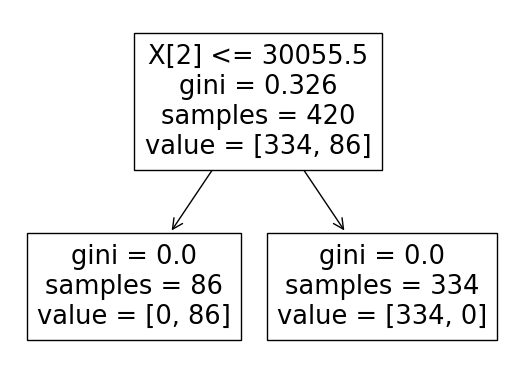

In [28]:
#plot the decision tree
tree.plot_tree(model_g);

In [29]:
#prediction and computing accuracy
pred1=model_g.predict(x_test)

In [30]:
pred1

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Risky',
       'Good', 'Good', 'Risky', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Goo

In [31]:
pd.Series(pred1).value_counts()

Good     142
Risky     38
dtype: int64

In [32]:
y_test

549     Good
124     Good
422     Good
579     Good
74      Good
       ...  
130     Good
188    Risky
171    Risky
222     Good
220     Good
Name: Target, Length: 180, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [33]:
np.mean(pred1==y_test)

1.0